In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%cd C:\Users\praga\Downloads\PRML\Assign2
datasetdf=pd.read_csv('A2Q1.csv',header=None)

dataset=datasetdf.to_numpy()

C:\Users\praga\Downloads\PRML\Assign2


In [4]:
def em_init(X,K=4):
    means=X[np.random.choice(len(X),K,replace=False)]
    K=4
    probab=[[np.random.sample()] for i in range(K)]
    probab=probab/np.sum(probab)
    
    return means,probab
    

In [5]:
means,probab=em_init(dataset)

In [6]:
def Expectation(theta):
    
    means,probab=theta   
    K=len(means)
    lamdba=[[]for i in range(K)] 
    lamdbaa=[[]for i in range(K)] 
    denom=[[0.]for i in range(len(dataset))]
    
    for k in range(K):

        lamdba[k]=means[k]*np.exp(-means[k]*dataset)*probab[k]
        denom+=lamdba[k]
    
    for j in range(K):
        if denom[j]==0:
            lamdbaa[j]=0
        else:            
            lamdbaa[j]=lamdba[j]/denom
    
    
        
    return lamdbaa

In [7]:
def Maximization(lamdba):
    K=len(lamdba)
    means=np.array([[np.sum(lamdba[i])/np.sum(lamdba[i]*dataset)] for i in range(K)])
    probab=np.array([[np.sum(lamdba[i])/len(dataset)] for i in range(K)])
    return means,probab
    
    
    

In [8]:
def convchk(theta1,theta0):
    return np.linalg.norm(theta1[0]-theta0[0])+np.linalg.norm(theta1[1]-theta0[1])

In [9]:
def LogL(theta):
    data=dataset
    alpha,Pi=theta
    
    
    LL = [np.log(np.sum([Pi[k]*alpha[k]*np.exp(-alpha[k]*data[i]) for k in range(4)])) for i in range(1000)]
    return np.sum(LL)

In [10]:
def LogL(theta):
    means,probab=theta 
    LL=[np.log(np.sum(
        [
            probab[k]*means[k]*np.exp(-means[k]*dataset[i]) 
         for k in range(4)])) 
     for i in range(len(dataset))]
    
    return np.sum(LL)
    
    

In [12]:
# theta_t=em_init(dataset,4)# initializing EM GMM
# perform=[LogL(theta_t)]
# nonconv=1
# while nonconv:
#     lamdba=Expectation(theta_t)
#     theta_T=Maximization(lamdba)
#     perform.append(LogL(theta_T))
#     if convchk(theta_T,theta_t)<0.01:
#         nonconv=0
#     theta_t=theta_T
    

In [18]:
from tqdm import tqdm
performset=[]
for la in tqdm(range(100)):
    theta_t=em_init(dataset,4)# initializing EM GMM
    perform=[LogL(theta_t)]
    nonconv=1
    i=0
    while nonconv and i<=150:
        lamdba=Expectation(theta_t)
        theta_T=Maximization(lamdba)
        perform.append(LogL(theta_T))
        if convchk(theta_T,theta_t)<0.001:
            nonconv=0
        i+=1
        theta_t=theta_T
    performset.append(perform)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:02<00:00,  2.42s/it]


In [19]:
min([len(k) for k in performset])

38

In [20]:
graphic=np.array([0.0 for i in range(30)])
for k in range(len(performset)):
#     print(graphic.shape)
#     print(np.shape(performset[k]))
    graphic+=np.array(performset[k][:30])
graphic=graphic/len(performset)

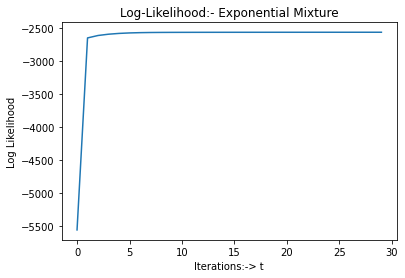

In [21]:
plt.plot(graphic)
plt.title('Log-Likelihood:- Exponential Mixture')
plt.xlabel('Iterations:-> t')
plt.ylabel(r'Log Likelihood')
plt.show()


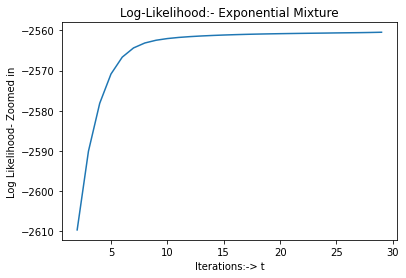

In [26]:
plt.plot(range(2,30),graphic[2:30])
plt.title('Log-Likelihood:- Exponential Mixture')
plt.xlabel('Iterations:-> t')
plt.ylabel(r'Log Likelihood- Zoomed in')
plt.show()


In [27]:
graphic[-1]

-2560.434402326306